In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_clipboard()

In [3]:
df.head()

,PlaceholderID,First Major Category,Graduating Major Category,Ethnicity,gndr_flag,Physics major at one time,class_type,course_id,grade_code,z_score
0,70F5188A-36E4-4FC5-A084-E41B8CBEB274,Engineering,Has Not Graduated,White (non-Hispanic),M,N,PHY,PHY183,3.0,-0.100195
1,70F5188A-36E4-4FC5-A084-E41B8CBEB274,Engineering,Has Not Graduated,White (non-Hispanic),M,N,PHY,PHY184,3.0,0.178007
2,70FF380C-A3CF-4B0E-B9EC-B0107E000C87,Engineering,Engineering,White (non-Hispanic),M,N,PHY,PHY183,3.5,0.456127
3,71043334-1B60-40D6-87F5-CD9B167A90F3,Engineering,Engineering,White (non-Hispanic),M,N,PHY,PHY183,4.0,0.906374
4,71043334-1B60-40D6-87F5-CD9B167A90F3,Engineering,Engineering,White (non-Hispanic),M,N,PHY,PHY184,2.5,-0.643793


In [7]:
df_gb = df.groupby(['Graduating Major Category', 'course_id']).mean().reset_index()

In [8]:
df_gb.head()

,Graduating Major Category,course_id,grade_code,z_score
0,Engineering,MTH132,2.872378,0.296137
1,Engineering,MTH133,2.647235,0.248979
2,Engineering,MTH234,2.666327,0.185677
3,Engineering,MTH235,2.824030,0.145827
4,Engineering,PHY183,3.214660,0.296719


In [11]:
df_gb_pivot = df_gb.pivot(index='course_id', columns='Graduating Major Category', values='z_score')

In [43]:
df_gb_pivot

Graduating Major Category,Engineering,Has Not Graduated,Non STEM,Other STEM,Physics
course_id,,,,,
MTH132,0.296137,-0.139868,-0.023939,0.148236,0.199836
MTH133,0.248979,-0.150400,-0.131073,0.126104,0.257570
MTH234,0.185677,-0.148014,-0.203100,0.105970,0.128310
MTH235,0.145827,-0.116999,-0.419336,-0.100901,-0.010883
PHY183,0.296719,-0.173381,-0.478985,0.131273,0.275772
PHY184,0.210174,-0.167844,-0.657293,0.021052,0.320978
PHY191,0.001356,-0.180343,-0.399002,0.059475,0.302984
PHY192,0.304282,-0.202422,-0.194853,0.049198,0.084076
PHY215,0.165719,-0.292238,-0.635595,0.049853,0.258375


In [44]:
df_gb_pivot

Graduating Major Category
Engineering          0.206097
Has Not Graduated   -0.174612
Non STEM            -0.349242
Other STEM           0.065584
Physics              0.201891
dtype: float64

In [20]:
pca = PCA(n_components=2)
pca.fit(df_gb_pivot)

PCA(copy=True, n_components=2, whiten=False)

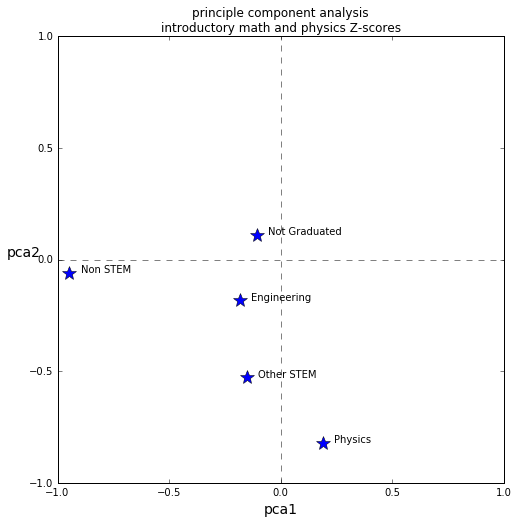

In [42]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.plot(pca.components_[0], pca.components_[1], marker='*', linestyle='', markersize=15)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.plot([-1,1],[0,0], color='gray', linestyle='--')
ax.plot([0,0],[-1,1], color='gray', linestyle='--')

ax.set_xlabel('pca1', fontsize=14)
ax.set_ylabel('pca2', rotation=0, fontsize=14)
ax.set_title('principle component analysis\nintroductory math and physics Z-scores')

for x,y,s in zip(pca.components_[0],pca.components_[1], ['Engineering', 'Not Graduated', 'Non STEM', 'Other STEM', 'Physics']):
    ax.text(x+0.05,y, s=s)